In [8]:
# Preparacion del entorno del trabajo para curso de etl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3
import openpyxl

In [20]:
! pip install psycopg2

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'psycopg2' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'psycopg2'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp313-cp313-macosx_11_0_arm64.whl size=133333 sha256=52dc2af9ef48d952a0fee8c17abbd65c90ad594734c70720ee44af8b732b561d
  Stored in directory: /Users/juanfelipearango/Library/Caches/pip/wheels/d1/02/6b/6fab072a7ac365814e6d6217fef5525fa5ac3c64204a418040
Successfully built psycopg2


In [5]:
data =pd.read_excel("/Users/juanfelipearango/Library/CloudStorage/OneDrive-Personal/Documents/Visual/Platzi/data.xlsx")

In [6]:
data.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [7]:
# Ver las primeras filas del dataframe
print("Primeras filas del dataframe:")
print(data.head())

# Información general del dataframe
print("\nInformación general sobre el dataframe:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

Primeras filas del dataframe:
    Age      Sex      ID    Race         Country   Education  Education-Num  \
0  39.0     Male   49084   White   United-States   Bachelors           13.0   
1  50.0     Male   68553   White   United-States   Bachelors           13.0   
2  38.0     Male  143654   White   United-States     HS-grad            9.0   
3  53.0     Male   41510   Black   United-States        11th            7.0   
4  28.0   Female  195025   Black            Cuba   Bachelors           13.0   

        Marital Status    Relationship  
0        Never-married   Not-in-family  
1   Married-civ-spouse         Husband  
2             Divorced   Not-in-family  
3   Married-civ-spouse         Husband  
4   Married-civ-spouse            Wife  

Información general sobre el dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age  


Distribución de las variables numéricas:


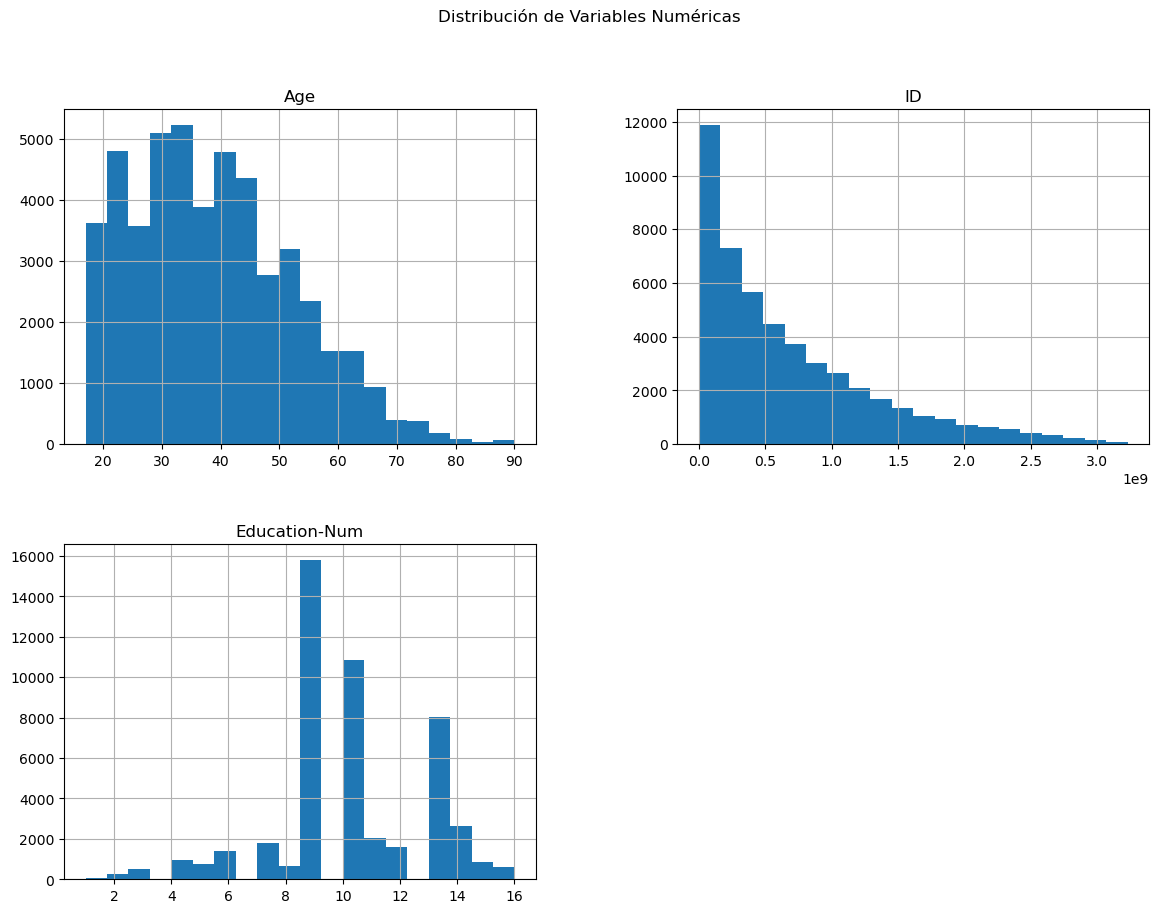


Matriz de correlación:


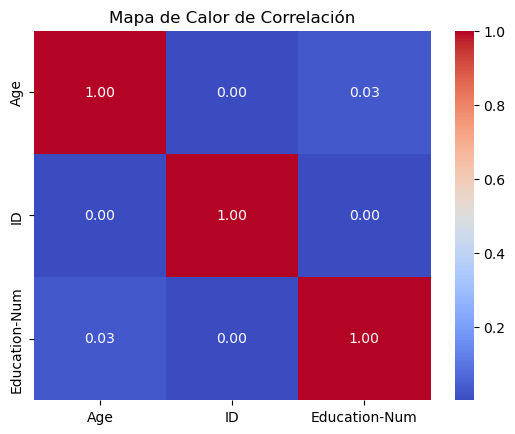


Valores únicos por columna:
Age                  74
Sex                   2
ID                48843
Race                  5
Country              42
Education            16
Education-Num        16
Marital Status        7
Relationship          6
dtype: int64


In [9]:
# Ver distribución de las variables numéricas
print("\nDistribución de las variables numéricas:")
data.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

# Correlación entre variables numéricas usando numeric_only
print("\nMatriz de correlación:")
corr = data.corr(numeric_only=True)  # O usar select_dtypes para filtrar columnas numéricas
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Mapa de Calor de Correlación")
plt.show()

# Ver la cantidad de valores únicos por columna
print("\nValores únicos por columna:")
print(data.nunique())

# Graficar la distribución de una variable específica
# (por ejemplo, si hay una columna llamada 'edad', para ver la distribución de la edad)
if 'edad' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['edad'], kde=True, color='blue')
    plt.title('Distribución de la Edad')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

# Verificación de outliers (valores atípicos) usando boxplot
# Si existe una columna llamada 'ingresos', para ver los outliers en ella
if 'ingresos' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['ingresos'])
    plt.title('Outliers en Ingresos')
    plt.show()

## Ingesta de datos con APIS

In [13]:
import requests
import json
url = 'https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json'
respuesta = requests.get(url)
print(respuesta)

<Response [200]>


In [11]:
respuesta.text

'[\n  {\n    "teamId": 1610612737,\n    "abbreviation": "ATL",\n    "teamName": "Atlanta Hawks",\n    "simpleName": "Hawks",\n    "location": "Atlanta"\n  },\n  {\n    "teamId": 1610612738,\n    "abbreviation": "BOS",\n    "teamName": "Boston Celtics",\n    "simpleName": "Celtics",\n    "location": "Boston"\n  },\n  {\n    "teamId": 1610612751,\n    "abbreviation": "BKN",\n    "teamName": "Brooklyn Nets",\n    "simpleName": "Nets",\n    "location": "Brooklyn"\n  },\n  {\n    "teamId": 1610612766,\n    "abbreviation": "CHA",\n    "teamName": "Charlotte Hornets",\n    "simpleName": "Hornets",\n    "location": "Charlotte"\n  },\n  {\n    "teamId": 1610612741,\n    "abbreviation": "CHI",\n    "teamName": "Chicago Bulls",\n    "simpleName": "Bulls",\n    "location": "Chicago"\n  },\n  {\n    "teamId": 1610612739,\n    "abbreviation": "CLE",\n    "teamName": "Cleveland Cavaliers",\n    "simpleName": "Cavaliers",\n    "location": "Cleveland"\n  },\n  {\n    "teamId": 1610612742,\n    "abbrevi

In [14]:
texto = respuesta.text
json_data = json.loads(texto)

In [ ]:
#Convertimos a un Json a un dataframe para faciltiar la manipulacion del data ser
df = pd.DataFrame.from_dict(json_data)
df.head()

,teamId,abbreviation,teamName,simpleName,location
0,1610612737,ATL,Atlanta Hawks,Hawks,Atlanta
1,1610612738,BOS,Boston Celtics,Celtics,Boston
2,1610612751,BKN,Brooklyn Nets,Nets,Brooklyn
3,1610612766,CHA,Charlotte Hornets,Hornets,Charlotte
4,1610612741,CHI,Chicago Bulls,Bulls,Chicago


revisar la api y documentacion y parametros disponbles, manejar excepciones un adecuado manejo de errores sera mas robusto

In [16]:
import requests

# URL de ejemplo que devuelve datos en formato JSON
url = "https://jsonplaceholder.typicode.com/posts/1"

try:
    # Hacemos la solicitud GET
    response = requests.get(url)
    
    # Comprobamos si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertimos la respuesta a JSON
        data = response.json()
        
        # Procesamos los datos JSON
        # En este caso, mostramos el título y el contenido del post
        print("Título:", data.get("title"))
        print("Contenido:", data.get("body"))
    else:
        print(f"Error: {response.status_code}")
        
except requests.RequestException as e:
    print(f"Error en la solicitud: {e}")

Título: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
Contenido: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto


Este código en Python utiliza la biblioteca **`requests`** para hacer una solicitud web y obtener datos de una API en formato **JSON**.

### Explicación de las librerías

- **`import requests`**: Esta línea importa la biblioteca `requests`. Es una de las bibliotecas más populares en Python para hacer peticiones HTTP de manera sencilla. Permite enviar solicitudes, obtener respuestas y manejar errores con facilidad.

---

### Lógica del código

El programa sigue los siguientes pasos:

1.  **Definición de la URL**:
    -   `url = "https://jsonplaceholder.typicode.com/posts/1"`: Se define una variable `url` que almacena la dirección de un servicio web (una API) que proporciona datos de prueba en formato JSON. En este caso, la URL devuelve información sobre un "post" con el ID número 1.

2.  **Manejo de errores con `try...except`**:
    -   El código está dentro de un bloque **`try`**. Esto es una buena práctica para manejar posibles errores que pueden ocurrir al hacer una solicitud de red, como problemas de conexión o URLs incorrectas.
    -   `except requests.RequestException as e:`: Si la solicitud falla por algún motivo (por ejemplo, no hay conexión a internet), el programa no se detiene abruptamente. En su lugar, el error es capturado y se muestra un mensaje explicativo.

3.  **Realización de la solicitud**:
    -   `response = requests.get(url)`: Esta es la parte central del código. La función `requests.get()` envía una solicitud de tipo **GET** a la URL especificada. El resultado de la solicitud se guarda en la variable `response`. El objeto `response` contiene información como el estado de la solicitud y los datos recibidos.

4.  **Verificación del estado de la respuesta**:
    -   `if response.status_code == 200:`: Se comprueba el **código de estado HTTP** de la respuesta. El código `200` significa que la solicitud fue **exitosa** y que el servidor respondió correctamente.

5.  **Procesamiento de los datos JSON**:
    -   `data = response.json()`: Si la solicitud fue exitosa, esta línea convierte el contenido de la respuesta de texto a un diccionario de Python. El formato **JSON** es muy similar a un diccionario de Python, lo que hace que esta conversión sea muy sencilla.
    -   `print("Título:", data.get("title"))`: Una vez que los datos están en un diccionario, se accede a la información usando las claves (keys). En este caso, se extrae el valor asociado a la clave `"title"`.
    -   `print("Contenido:", data.get("body"))`: De manera similar, se extrae el valor asociado a la clave `"body"`.

6.  **Manejo de respuestas no exitosas**:
    -   `else: print(f"Error: {response.status_code}")`: Si el código de estado no es `200` (por ejemplo, `404` si la página no se encuentra o `500` si hay un error en el servidor), este bloque se ejecuta y muestra un mensaje de error con el código correspondiente.

# Conexión y consulta de bases de datos en Python 
Las bases de datos SQL, como PostgreSQL, MySQL y SQLite, son relacionales y usan tablas para organizar la información. Para conectarse a ellas, necesitas un conector o controlador (driver) de Python.

## psycopg2

In [19]:
import psycopg2

# Conexión
try:
    conn = psycopg2.connect(
        dbname="mi_db",
        user="usuario",
        password="password",
        host="localhost"
    )
    print("Conexión a PostgreSQL exitosa")

    # Crear un cursor para ejecutar comandos SQL
    cur = conn.cursor()

    # Ejecutar una consulta de ejemplo
    cur.execute("SELECT version();")
    db_version = cur.fetchone()
    print(f"Versión de la base de datos: {db_version[0]}")

    # Cerrar el cursor y la conexión
    cur.close()
    conn.close()

except Exception as e:
    print(f"Error al conectar: {e}")

ModuleNotFoundError: No module named 'psycopg2'

# mysql-connector-python

In [ ]:
import mysql.connector

# Conexión
try:
    conn = mysql.connector.connect(
        user="usuario",
        password="password",
        host="localhost",
        database="mi_db"
    )
    print("Conexión a MySQL exitosa")

    # Crear un cursor
    cursor = conn.cursor()

    # Ejecutar una consulta
    cursor.execute("SELECT * FROM tabla_ejemplo;")
    for fila in cursor:
        print(fila)

    cursor.close()
    conn.close()

except mysql.connector.Error as e:
    print(f"Error al conectar: {e}")

# sqlite3

In [ ]:
import sqlite3

# Conexión (crea un archivo si no existe)
conn = sqlite3.connect('mi_base_de_datos.db')
print("Conexión a SQLite exitosa")

# Crear un cursor
cursor = conn.cursor()

# Ejecutar una consulta (crear una tabla)
cursor.execute("""
    CREATE TABLE IF NOT EXISTS usuarios (
        id INTEGER PRIMARY KEY,
        nombre TEXT NOT NULL
    )
""")
conn.commit() # Guardar los cambios

conn.close()

# Conexión a bases de datos NoSQL

# pymongo

In [ ]:
from pymongo import MongoClient

# Conexión (asegúrate de que MongoDB esté corriendo en el host y puerto)
try:
    client = MongoClient("mongodb://localhost:27017/")
    db = client["mi_basedatos_nosql"]
    collection = db["mi_coleccion"]

    print("Conexión a MongoDB exitosa")

    # Insertar un documento
    post_id = collection.insert_one({"nombre": "ejemplo", "valor": 123}).inserted_id
    print(f"Documento insertado con ID: {post_id}")

    # Encontrar un documento
    documento = collection.find_one({"nombre": "ejemplo"})
    print("Documento encontrado:", documento)

    # Cerrar la conexión
    client.close()

except Exception as e:
    print(f"Error al conectar: {e}")

# redis-py

In [ ]:
import redis

# Conexión
try:
    r = redis.Redis(host='localhost', port=6379, db=0)
    print("Conexión a Redis exitosa")

    # Guardar un valor
    r.set('clave', 'hola mundo')

    # Obtener un valor
    valor = r.get('clave').decode('utf-8')
    print(f"Valor recuperado de Redis: {valor}")

except Exception as e:
    print(f"Error al conectar: {e}")